# Deterministic Models: Systems of Differential Equations

In [2]:
import numpy as np
import scipy.integrate as spi
import scipy.linalg as la
import matplotlib.pyplot as plt

print("packages imported")

packages imported


## Learning Goals

* Classify systems of differential equations: order, dimension, linear, autonomous
* Transform higher order systems of differential equations into first order systems
* Compute and visualize numerical solutions of systems of differential equations
* Compute and classify equilibrium solutions of autonomous differential equations

## Prelecture Readings

* [MATH 360 > Differential Equations > Systems of Equations](https://ubcmath.github.io/MATH360/deterministic/differential/systems.html)
* [Mathematical Python > Differential Equations > Systems of Equations](https://patrickwalls.github.io/mathematicalpython/differential-equations/systems/)

## Systems of First Order Differental Equations

Write the following system as a first order system:

\begin{align*}
m_1 x_1'' &= k(x_2 - x_1) \\
m_2 x_2'' &= -k(x_2 - x_1)
\end{align*}

The system is a model of two masses attached by a spring. See [Notes of Diffy Qs: Example 3.1.3](https://www.jirka.org/diffyqs/html/sec_introtosys.html).

Write the following vector equation as a first order system:

$$
\frac{d^2 \mathbf{x}}{dt^2} = -\frac{\mathbf{x}}{\| \mathbf{x} \|^3}
$$

where $\mathbf{x}(t) = (x_1(t),x_2(t))$. This is the equation of motion for planetary motion. See [MATH360 > Objects in Motion > Planetary Motion](https://ubcmath.github.io/MATH360/deterministic/motion/orbits.html).

In [3]:
def f(t, u):
    dudt = np.zeros(4)
    dudt[0] = u[1]
    dudt[1] = -(u[0]**2 + u[2]**2)**(3/2) * u[0]
    dudt[2] = u[3]
    dudt[3] = -(u[0]**2 + u[2]**2)**(3/2) * u[2]
    return dudt


Write the second order equation as a first order system:

$$
t^2 y'' + t y' + y = 0
$$

This is a called a Cauchy-Euler equations. See [Wikipedia: Cauchy-Euler equation](https://en.wikipedia.org/wiki/Cauchy–Euler_equation).

## `scipy.integrate.odeint`

Compute solutions of the system for different initial values:

\begin{align*}
m_1 x_1'' &= k(x_2 - x_1) \\
m_2 x_2'' &= -k(x_2 - x_1)
\end{align*}

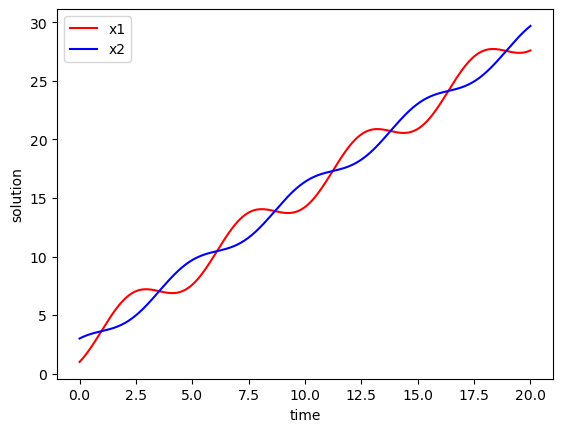

In [4]:
k = 1
m1 = 1
m2 = 2

# components of the u vector will be: u[0] = x1, u[1] = x1', u[2] = x2, u[3] = x2'

def f(u, t):
    dudt = np.zeros(4) # create a vector of zeros to be filled out
    dudt[0] = u[1]
    dudt[1] = k/m1 * (u[2] - u[0])
    dudt[2] = u[3]
    dudt[3] = -k/m2 * (u[2] - u[0])
    return dudt

t = np.linspace(0, 20, 500) # time points where solution is computed
u0 = [1, 2, 3, 1] # initial condition: 
u = spi.odeint(f,u0,t)

plt.plot(t, u[:, 0], 'r')
plt.plot(t,u[:, 2], 'b')
plt.xlabel('time')
plt.ylabel('solution')
plt.legend(['x1', 'x2'])
plt.show()


Compute solutions of the following system for different initial values:

$$
\frac{d^2 \mathbf{x}}{dt^2} = -\frac{\mathbf{x}}{\| \mathbf{x} \|^3} 
$$

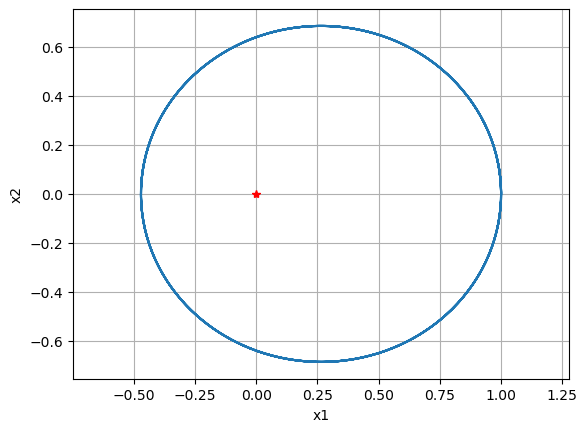

: 

In [ ]:
k = 1
m1 = 1
m2 = 2

# components of the u vector will be: u[0] = x1, u[1] = x1', u[2] = x2, u[3] = x2'
def f(u, t):
    dudt = np.zeros(4)
    dudt[0] = u[1]
    dudt[1] = -u[0]/(u[0]**2 + u[2]**2)**(3/2)
    dudt[2] = u[3]
    dudt[3] = -u[2]/(u[0]**2 + u[2]**2)**(3/2)
    return dudt

t = np.linspace(0, 20, 1000)
u0 = [1.,0.,0.,.8]
u = spi.odeint(f, u0, t)

plt.plot(0,0,'r*')
plt.plot(u[:,0],u[:,2])
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.axis('equal')
plt.show()


Compute the unique solution of the second order equation:

$$
t^2 y'' + t y' + y = 0 \ , \ \ y(1) = 0 \ , \ \ y'(1) = 1
$$

/var/folders/8b/8xv60sm9601dqdzch7jd5lsr0000gn/T/ipykernel_89787/3979331679.py:15: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  u = spi.odeint(f,u0,t)


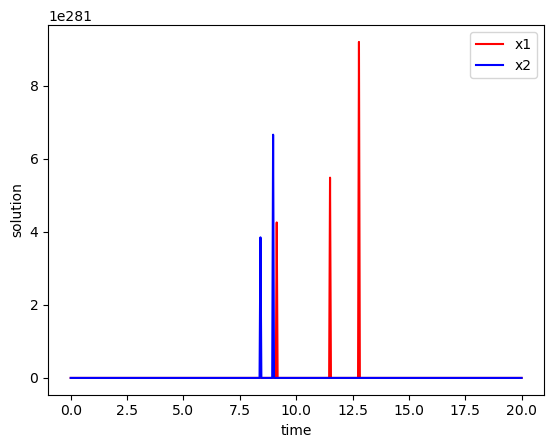

In [11]:
# components of the u vector will be: u[0] = x1, u[1] = x1', u[2] = x2, u[3] = x2'

def f(u, t):
    dudt = np.zeros(4) # create a vector of zeros to be filled out
    rho = -1/(u[0]**2 + u[2]**2)**(3/2)

    dudt[0] = u[1]
    dudt[1] = rho * u[0] 
    dudt[2] = u[3]
    dudt[3] = rho * u[2]
    return dudt

t = np.linspace(0, 20, 500) # time points where solution is computed
u0 = [1., 0., 0., 0.] # initial condition: 
u = spi.odeint(f,u0,t)

plt.plot(t, u[:, 0], 'r')
plt.plot(t,u[:, 2], 'b')
plt.xlabel('time')
plt.ylabel('solution')
plt.legend(['x1', 'x2'])
plt.show()


Compute solutions of the [Duffing equation](https://en.wikipedia.org/wiki/Duffing_equation):

$$
x'' + \delta x' + \alpha x + \beta x^3 = \gamma \cos(\omega t) \ , \ \ x(0)=x'(0)=0
$$

Compute solutions of the [Van der Pol equation](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator) for different initial values:

$$
x'' - \mu(1 - x^2)x' + x = 0
$$

## Linear Stability Analysis

Consider the system of differential equations:

\begin{align*}
x' &= 1 - y^2 \\
y' &= x - y
\end{align*}

* Plot trajectories $(x(t),y(t))$ for different initial values $x(0)$ and $y(0)$.
* Find all values $\alpha$ such that if $x(0) = y(0) = \alpha$ then the corresponding solution satisfies $x(t) \to 1$ and $y(t) \to 1$ as $t \to \infty$.
* Find all values $\alpha$ such that if $x(0) = y(0) = \alpha$ then the corresponding solution satisfies $x(t) \to -1$ and $y(t) \to -1$ as $t \to \infty$.

Consider the system of differential equations:

\begin{align*}
x' &= xy + 2y + z^2 \\
y' &= x - y \\
z' &= (x - y)^2 - 3z
\end{align*}

* Find and classify the critical points of the system.
* Plot trajectories for different initial values $x(0)$, $y(0)$ and $z(0)$.